## Численные методы

[yandex_practicum](https://practicum.yandex.ru/learn/data-scientist/courses/cb9f272a-0704-4adc-b2c1-4ff9775299ed/sprints/176072/topics/6e08ebb3-d98e-4fa7-bab9-a70cf681f38d/lessons/2ab3ee89-fba4-47ec-83f2-08e880f69004/)

### Итеративные методы

Другой подход к обучению модели линейной регрессии — итеративный метод, или итеративный алгоритм (англ. iterative method; iterative algorithm). 

Он не даёт точного решения, только приближённое. Название метода произошло от латинского слова iteratio («повторение»). Алгоритм многократно выполняет похожие итерации, на каждом шаге решение становится всё точнее. Если слишком большая точность не нужна, хватит и небольшого числа итераций.

Вычислительная сложность итеративных методов зависит от числа шагов, на которое может влиять и содержание данных.

#### Метод бисекции


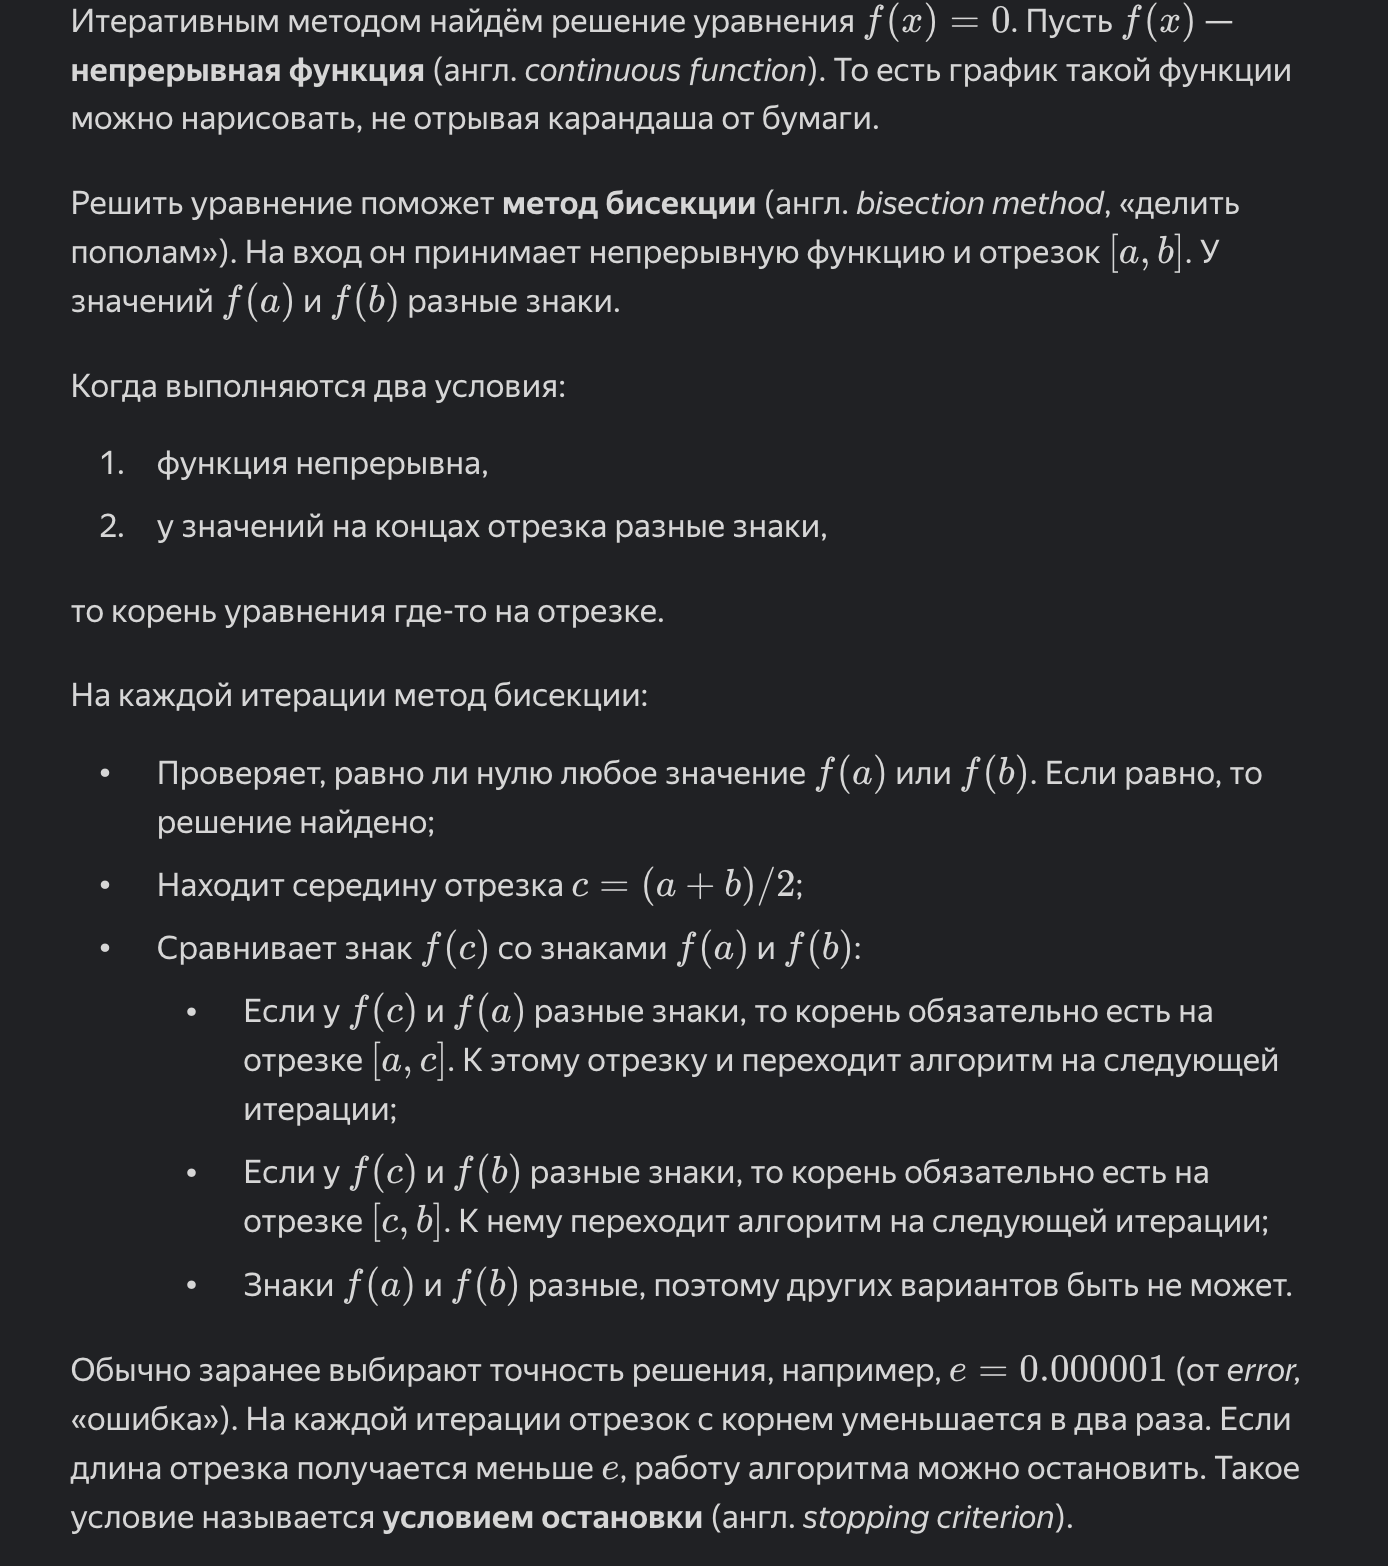

Пример работы метода бисекции для двух непрерырвных функций

In [1]:
import math

def bisect(function, left, right, error):
    # Цикл while повторяет код, пока выполняется условие.
    # Добавили в него условие остановки.
    while right - left > error:

        # проверяем, нет ли нулей
        if function(left) == 0:
            return left
        elif function(right) == 0:
            return right
        
        # делим отрезок пополам и находим новый отрезок
        middle = (left + right) / 2
        if function(left) * function(middle) < 0:
            right = middle
        else:
            left=middle
    return left


def f1(x):
    return x**3 - x**2 - 2*x 


def f2(x):
    return (x+1)*math.log10(x) - x**0.75


print(bisect(f1, 1, 4, 0.000001))
print(bisect(f2, 1, 4, 0.000001))

1.999999761581421
3.6952309608459473


### Градиент функции

Минимум функции потерь не всегда можно найти вручную. 

Разобраться, в каком он направлении, поможет градиент функции (англ. function gradient).

Примеры 

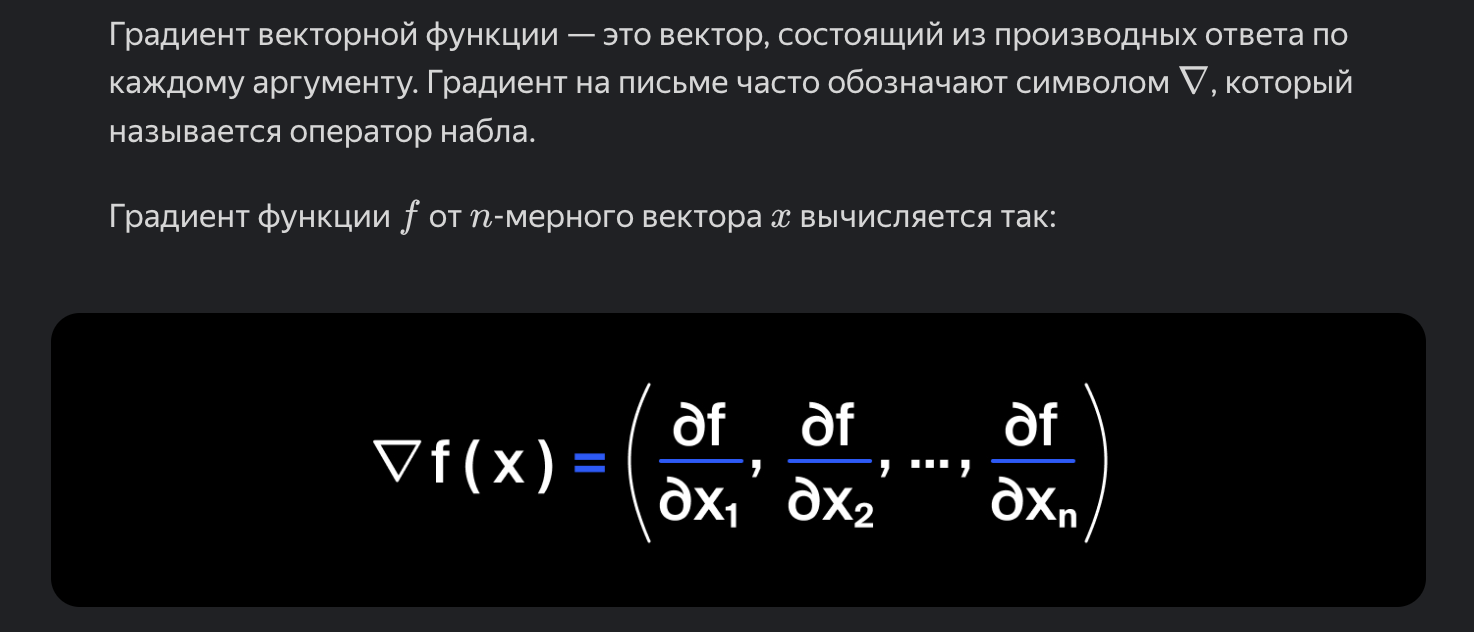

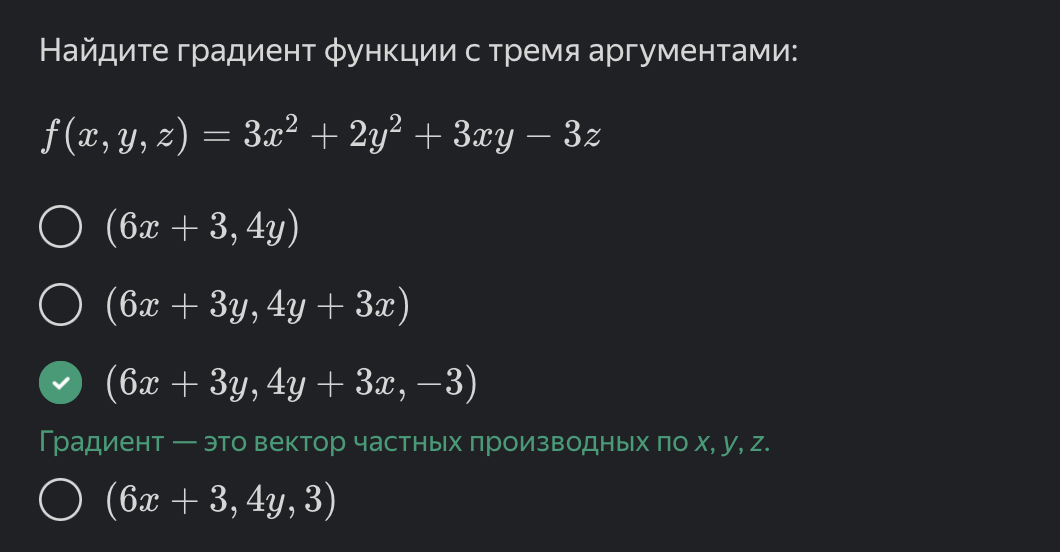

Антиградиент 

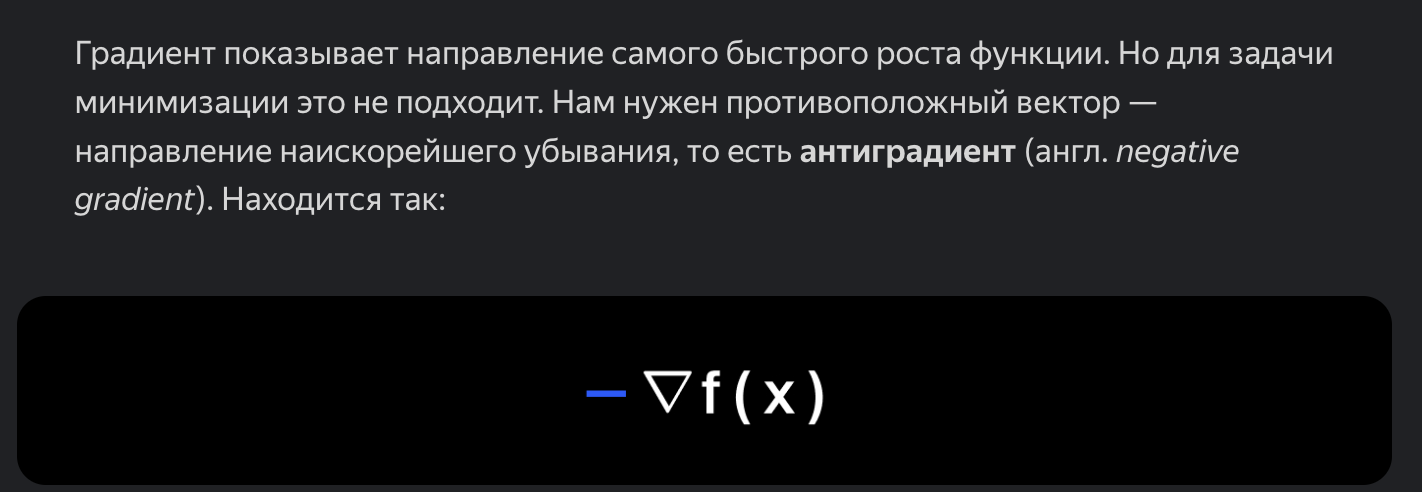

### Градиентный спуск

Найдём минимум функции потерь алгоритмом градиентного спуска.

Градиентный спуск (англ. gradient descent) — это итеративный алгоритм поиска минимума функции потерь. Он движется по направлению антиградиента и постепенно приближается к минимуму.


Алгоритм градиентного спуска работает так же: «погружается на дно», многократно выполняя однотипные шаги. Добраться до минимума за одну итерацию сложно, ведь вектор антиградиента показывает направление убывания, а не конкретную точку минимума функции потерь.


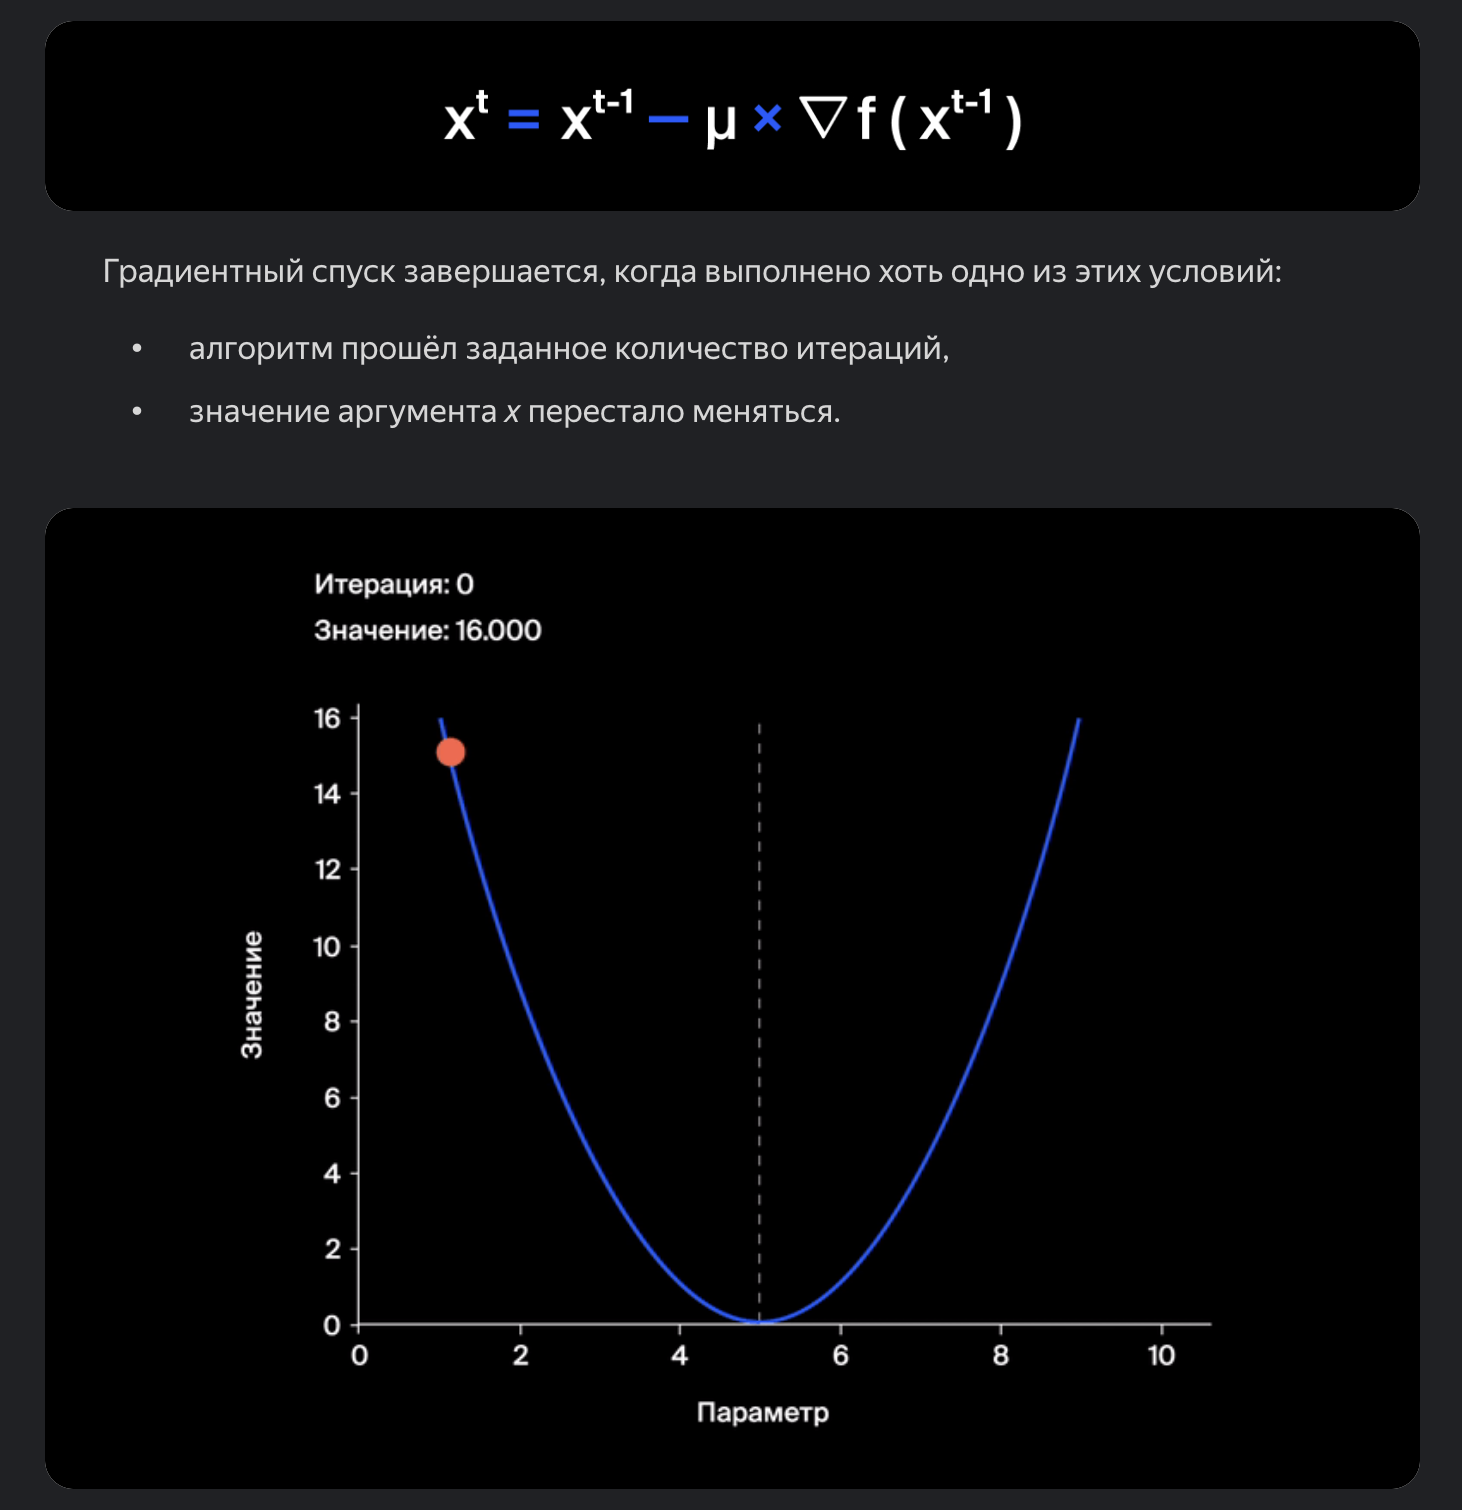

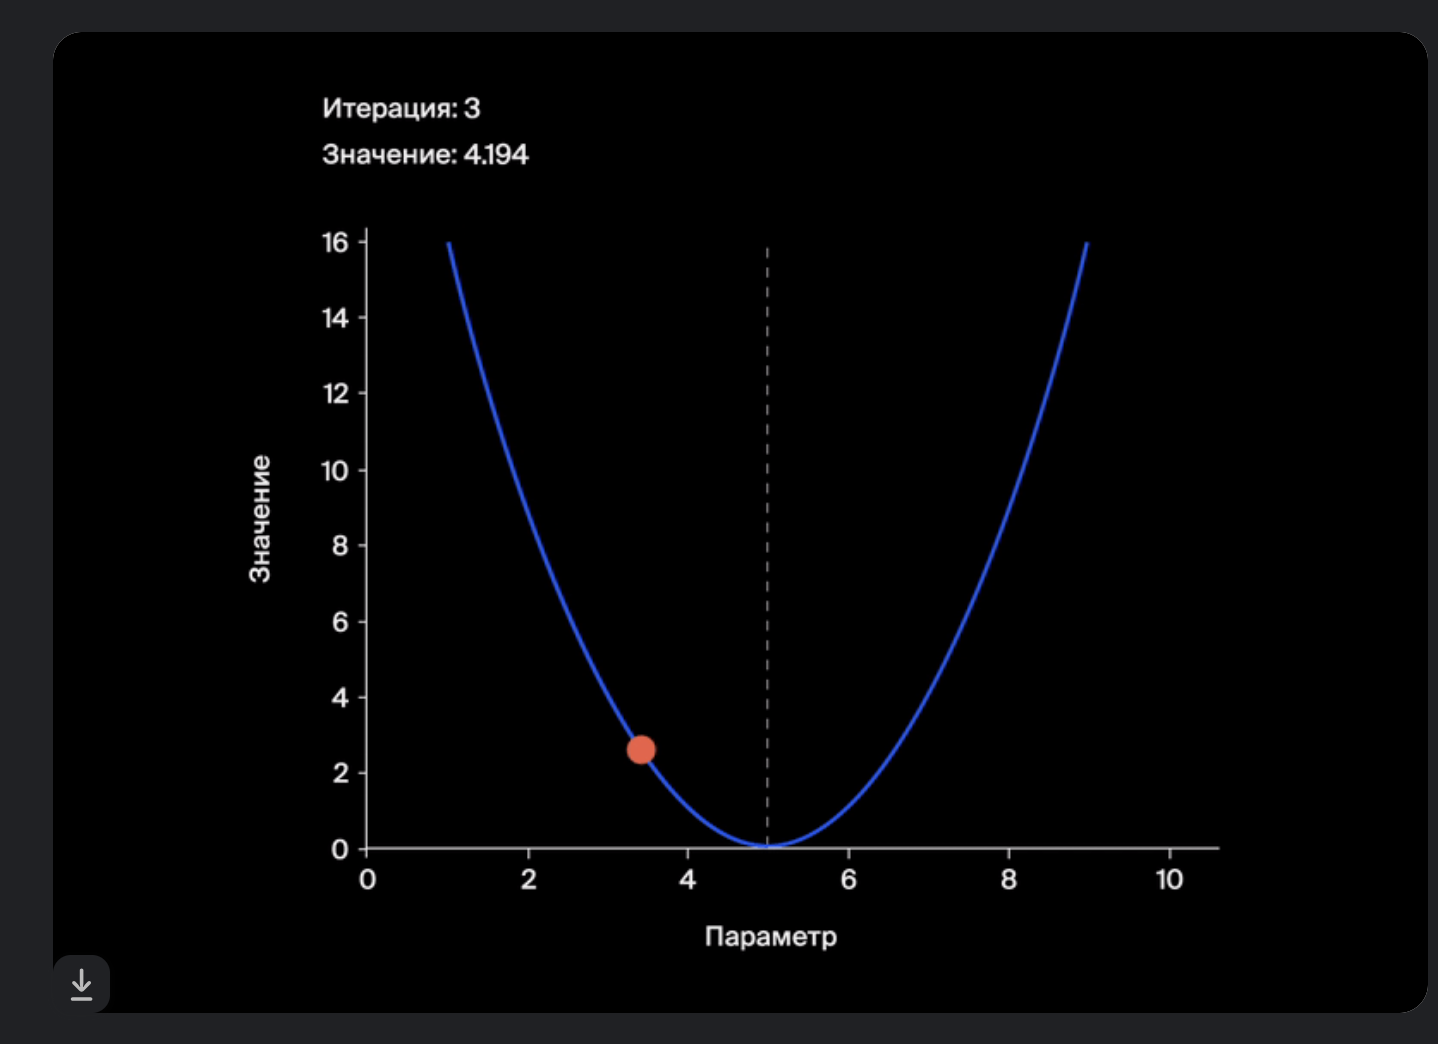

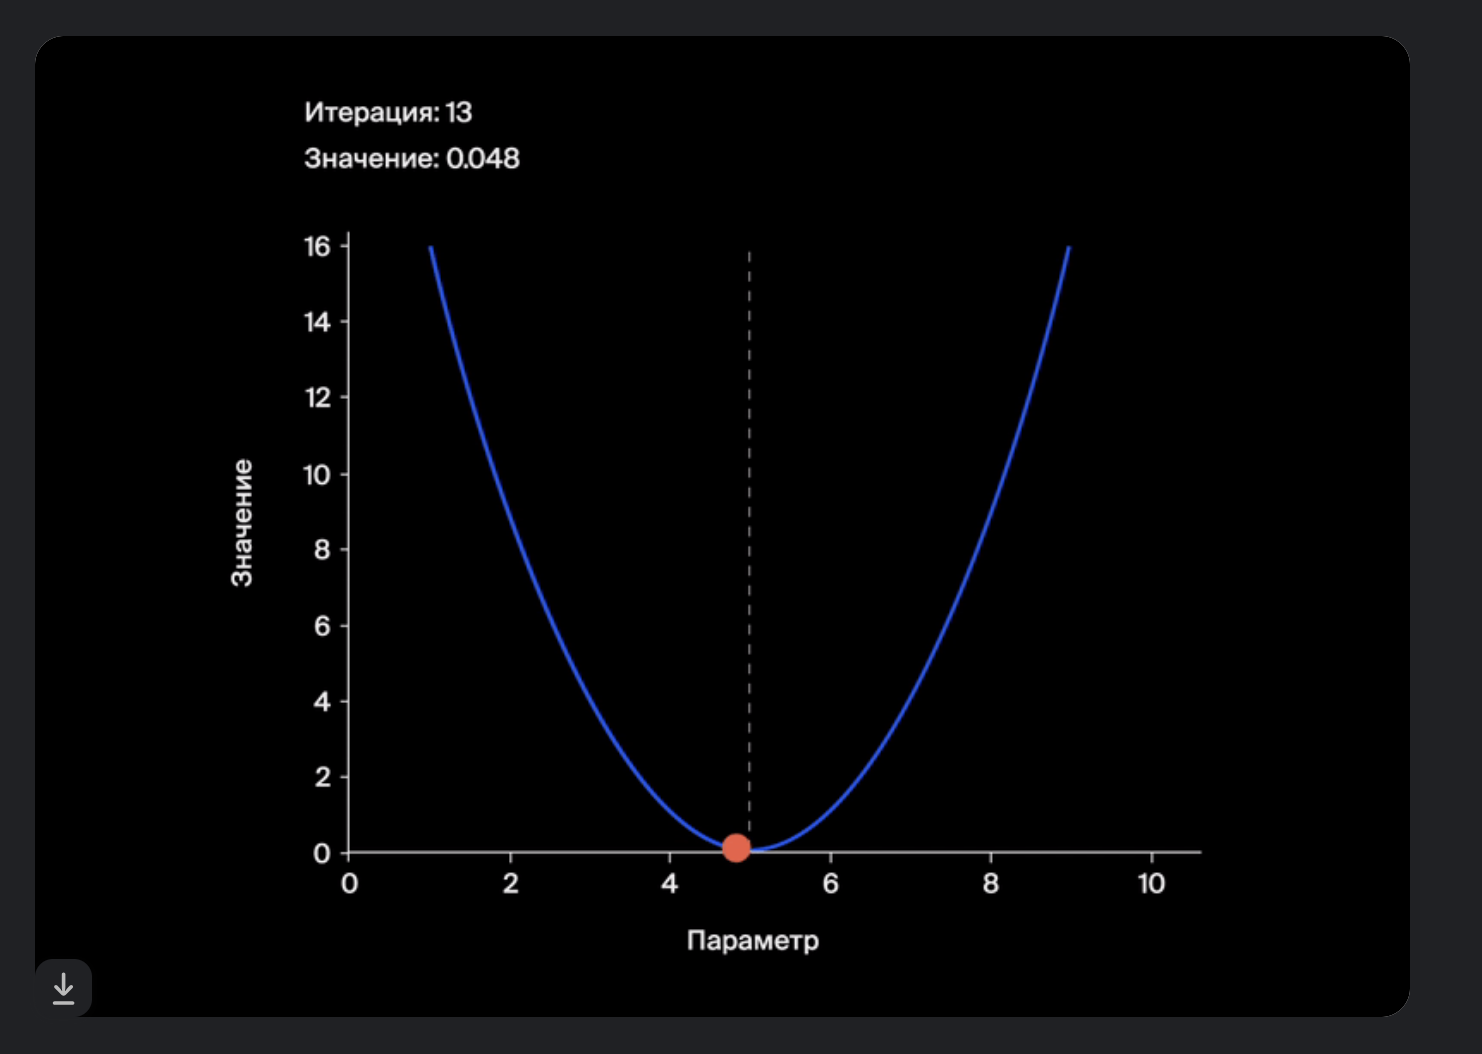

Пример: 

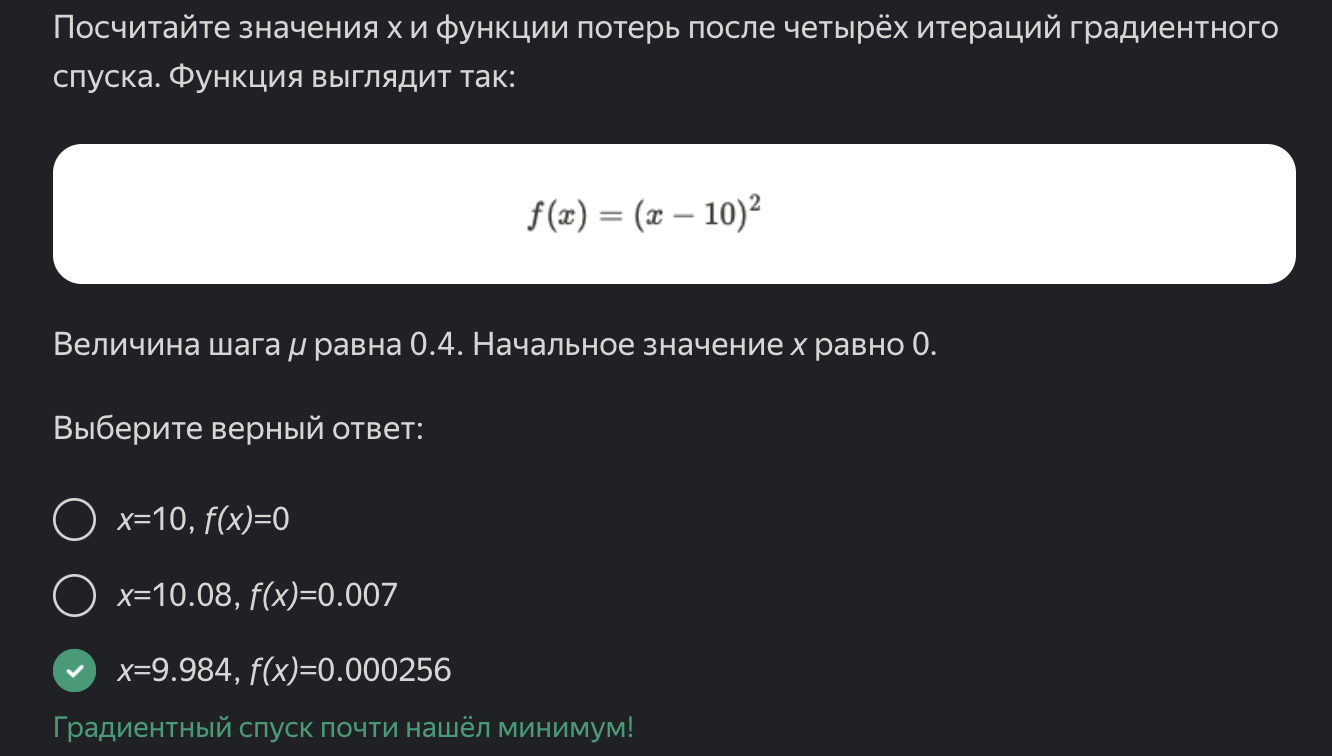

Пример 2

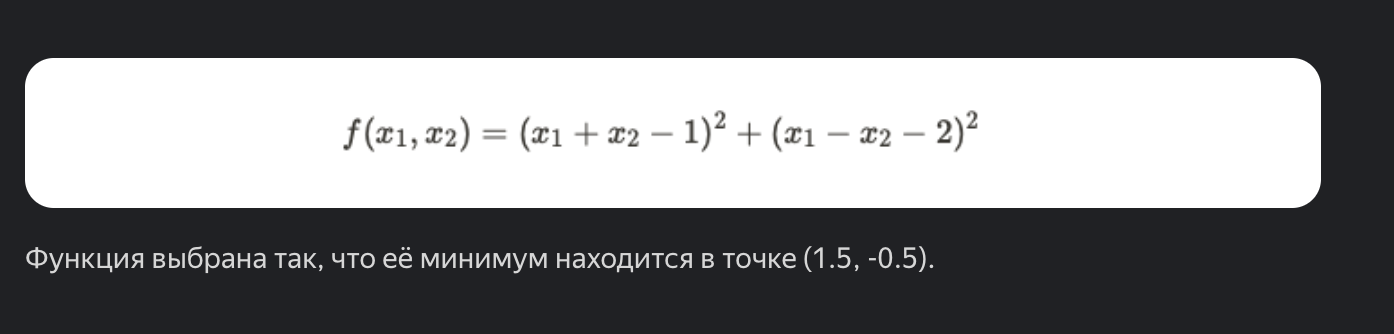

In [1]:
# сначала считаем функцию градиента

import numpy as np

def func(x):
    return (x[0] + x[1] - 1)**2 + (x[0] - x[1] - 2)**2

def gradient(x):
    return np.array([4 * x[0] - 6, 4*x[1]+2]) # < напишите код здесь >])

print(gradient(np.array([0, 0])))
print(gradient(np.array([0.5, 0.3])))

[-6  2]
[-4.   3.2]


In [2]:
# теперь считаем функцию потерь

import numpy as np

def func(x):
    return (x[0] + x[1] - 1)**2 + (x[0] - x[1] - 2)**2

def gradient(x):
    return np.array([4 * x[0] - 6, 4 * x[1] + 2])

def gradient_descent(initialization, step_size, iterations):
    for i in range(iterations):
        temp_vect = initialization - step_size * gradient(initialization)
        initialization = temp_vect

    return temp_vect    


print(gradient_descent(np.array([0, 0]), 0.1, 5))
print(gradient_descent(np.array([0, 0]), 0.1, 100))

[ 1.38336 -0.46112]
[ 1.5 -0.5]


### Градиентный спуск для линейной регрессии

Формула обучения линейной регрессии на градиентном спуске

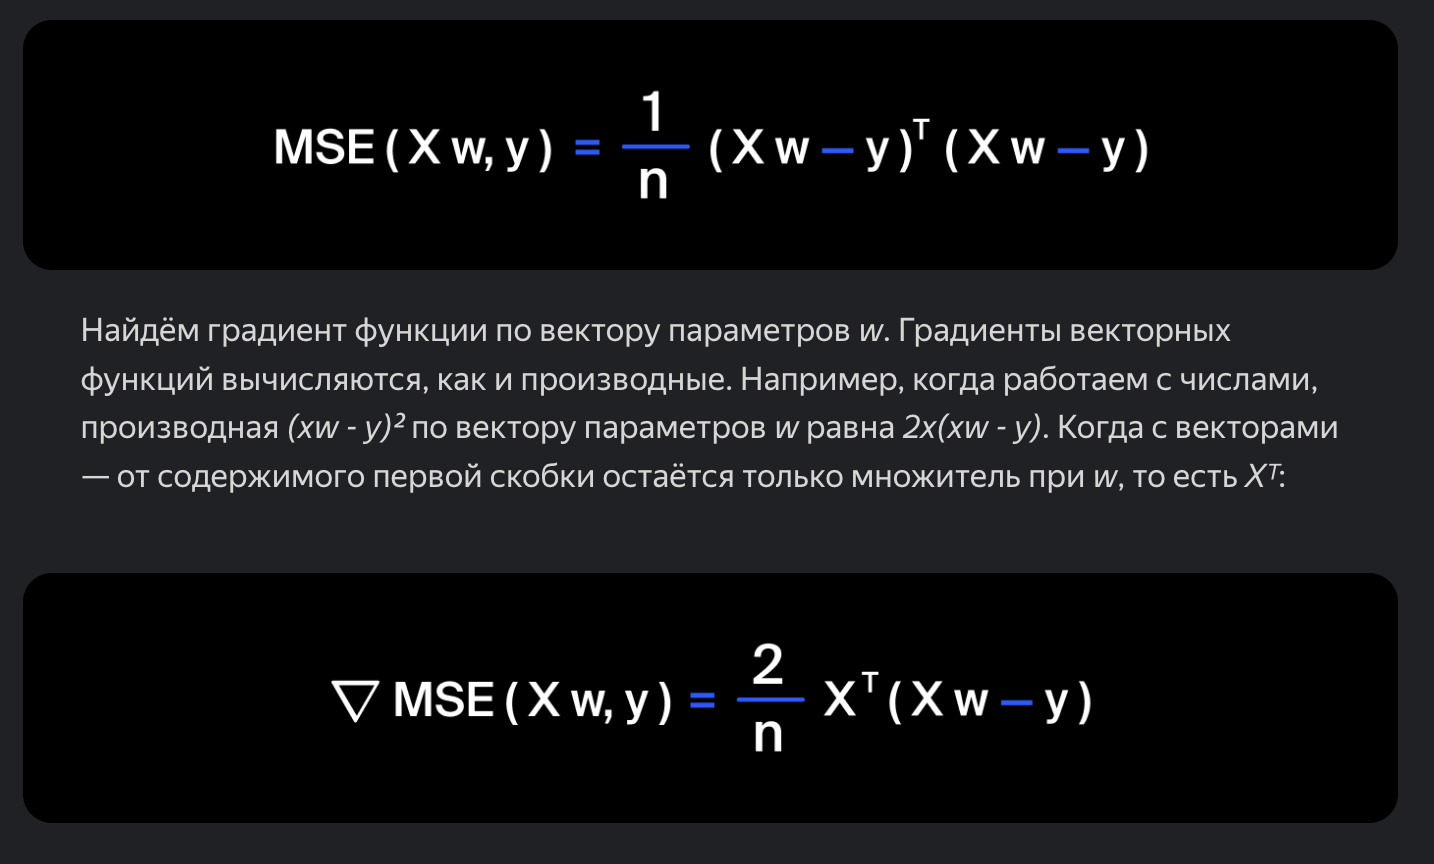

### Стохастический градиентный спуск

Алгоритм стохастического градиентного спуска работает так:

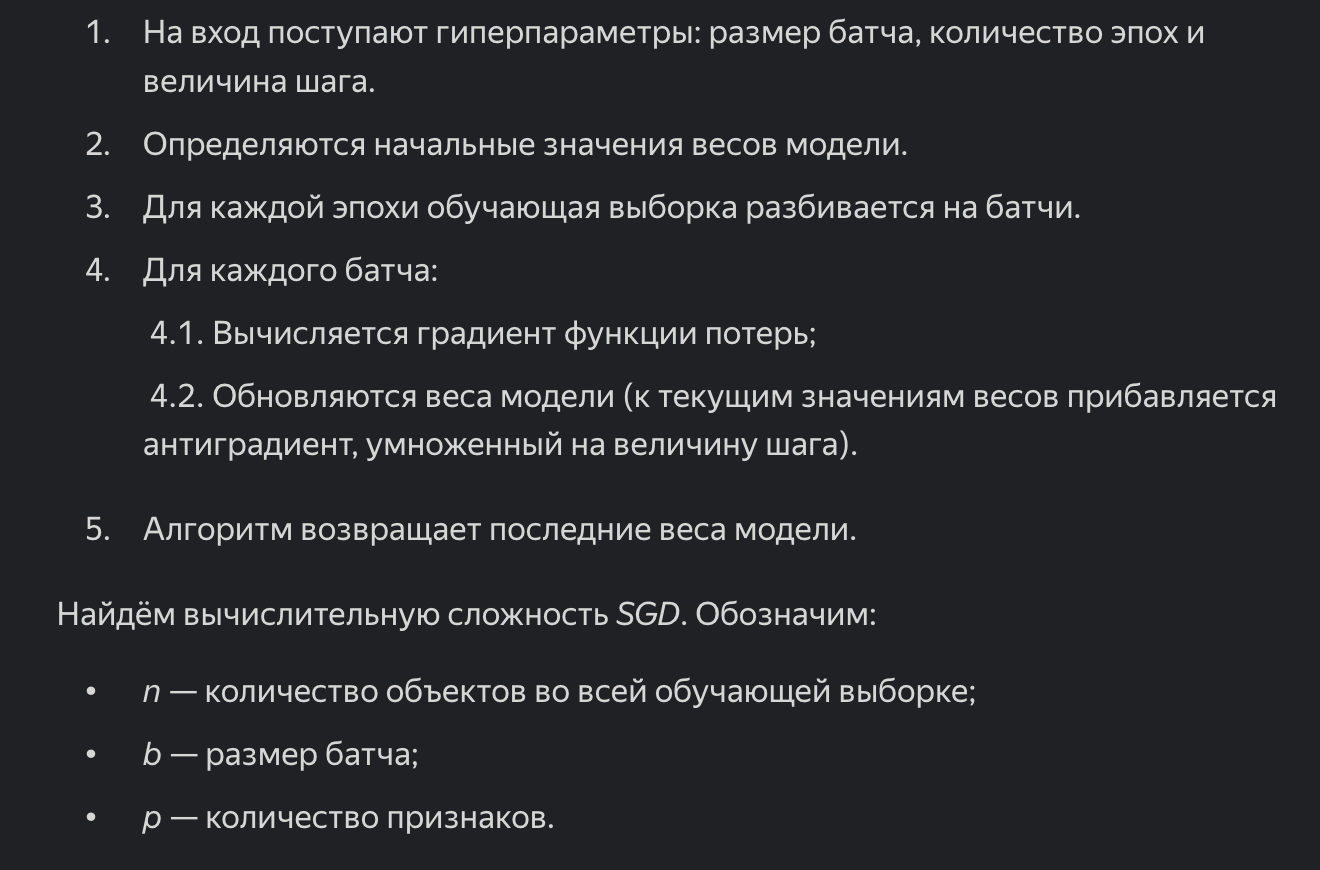

### SGD на Python
Напишите алгоритм SGD для модели линейной регрессии.

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

#data_train = pd.read_csv('/datasets/train_data_n.csv')
data_train = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/12_numeric_methods/data/train_data_n.csv')
features_train = data_train.drop(['target'], axis=1)
target_train = data_train['target']

# data_test = pd.read_csv('/datasets/test_data_n.csv')
data_test = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/12_numeric_methods/data/test_data_n.csv')
features_test = data_test.drop(['target'], axis=1)
target_test = data_test['target']



In [4]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,target
0,-0.64,-0.52,0.11,-0.69,0.00,-0.76,-0.18,-0.75,-0.74,-0.50,...,1.12,-0.23,-0.63,-0.38,1.73,0.03,-0.12,-0.20,-0.11,3.64
1,-0.68,-0.43,0.33,0.14,0.07,1.61,0.65,0.17,1.23,-0.41,...,-1.63,0.18,-0.49,0.13,-0.13,0.54,-0.03,0.33,-0.48,6.59
2,-1.00,-0.39,0.38,0.15,0.83,0.54,-1.36,-0.91,-0.94,2.50,...,-1.19,0.24,-0.69,1.39,0.45,0.65,-1.19,-0.38,-0.47,2.08
3,0.18,0.91,1.39,0.33,-1.57,-0.35,0.69,0.30,-1.04,1.12,...,1.30,0.83,0.81,0.93,0.99,0.51,-1.13,-1.13,1.69,5.97
4,-0.34,0.86,-0.23,-0.52,-0.14,0.00,1.31,0.18,-1.57,-0.50,...,-1.82,-0.15,2.13,-0.27,1.24,1.26,-0.68,0.06,-0.16,1.72


In [5]:

class SGDLinearRegression:
    def __init__(self, step_size, epochs, batch_size):
        self.step_size = step_size
        self.epochs = epochs
        self.batch_size = batch_size 
        # < напишите код здесь >

    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.zeros(X.shape[1])
        


        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return  test_features.dot(self.w) + self.w0


# мы уже передали подходящие для обучения параметры
model = SGDLinearRegression(0.01, 1, 200)
model.fit(features_train, target_train)
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)
print(r2_score(target_train, pred_train).round(5))
print(r2_score(target_test, pred_test).round(5))

-0.16938
-0.14579


Теперь в алгоритм включим цикл по эпохам и батчам, учитывая шаг по антиградиенту

In [9]:



class SGDLinearRegression:
    def __init__(self, step_size, epochs, batch_size):
        self.step_size = step_size
        self.epochs = epochs
        self.batch_size = batch_size
    
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)        
        y = train_target
        w = np.zeros(X.shape[1])
        
        for _ in range(self.epochs):
            batches_count = X.shape[0] // self.batch_size # < напишите код здесь >
            for i in range(batches_count):
                begin = i * self.batch_size
                end = (i + 1) * self.batch_size
                X_batch = X[begin:end, :]
                y_batch = y[begin:end]
                
                gradient = 2 / X_batch.shape[0] * X_batch.T.dot(X_batch.dot(w) - y_batch)# < напишите код здесь >
                
                w -= self.step_size * gradient # < напишите код здесь >

        self.w = w[1:]
        self.w0 = w[0]
        self.batches_count = batches_count
        
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = SGDLinearRegression(0.01, 10, 100)
model.fit(features_train, target_train)
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)
print(r2_score(target_train, pred_train).round(5))
print(r2_score(target_test, pred_test).round(5))

0.21882
0.06296


Используем регуляризацию весов линейной регрессии

In [13]:


class SGDLinearRegression:
    def __init__(self, step_size, epochs, batch_size, reg_weight):
        self.step_size = step_size
        self.epochs = epochs
        self.batch_size = batch_size
        self.reg_weight = reg_weight
    
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)        
        y = train_target
        w = np.zeros(X.shape[1])
        
        for _ in range(self.epochs):
            batches_count = X.shape[0] // self.batch_size
            for i in range(batches_count):
                begin = i * self.batch_size
                end = (i + 1) * self.batch_size
                X_batch = X[begin:end, :]
                y_batch = y[begin:end]
                
                gradient = 2 * X_batch.T.dot(X_batch.dot(w) - y_batch) / X_batch.shape[0]
								# копируем вектор w, чтобы его не менять
                reg = 2 * w.copy()
                reg[0] = 0
                gradient += self.reg_weight * reg
                
                w -= self.step_size * gradient

        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

# Чтобы сравнить гребневую регрессию с линейной,
# начнём с веса регуляризации, равного 0. Затем добавим
# обучение с его различными значениями.
print("Регуляризация:", 0.0)
model = SGDLinearRegression(0.01, 10, 100, 0.0)
model.fit(features_train, target_train)
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)
print(r2_score(target_train, pred_train).round(5))
print(r2_score(target_test, pred_test).round(5))

print("Регуляризация:", 0.1)
model = SGDLinearRegression(0.01, 10, 100, 0.1)
model.fit(features_train, target_train)
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)
print(r2_score(target_train, pred_train).round(5))
print(r2_score(target_test, pred_test).round(5))

print("Регуляризация:", 1.0)
model = SGDLinearRegression(0.01, 10, 100, 1.0)
model.fit(features_train, target_train)
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)
print(r2_score(target_train, pred_train).round(5))
print(r2_score(target_test, pred_test).round(5))

print("Регуляризация:", 10.0)
model = SGDLinearRegression(0.01, 10, 100, 10.0)
model.fit(features_train, target_train)
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)
print(r2_score(target_train, pred_train).round(5))
print(r2_score(target_test, pred_test).round(5))

Регуляризация: 0.0
0.21882
0.06296
Регуляризация: 0.1
0.21488
0.07001
Регуляризация: 1.0
0.16661
0.08061
Регуляризация: 10.0
0.03945
0.02412


### Градиентный бустинг

Каждая базовая модель в бустинге старается «сдвинуть» предсказания прошлого шага в сторону правильных ответов. Так минимизируют функцию потерь. Градиентный спуск помогает делать это эффективнее. 

Мы по-прежнему будем минимизировать функцию потерь. Но аргументом, по которому идёт спуск, станут ответы модели! Это и есть градиентный бустинг (англ. gradient boosting).

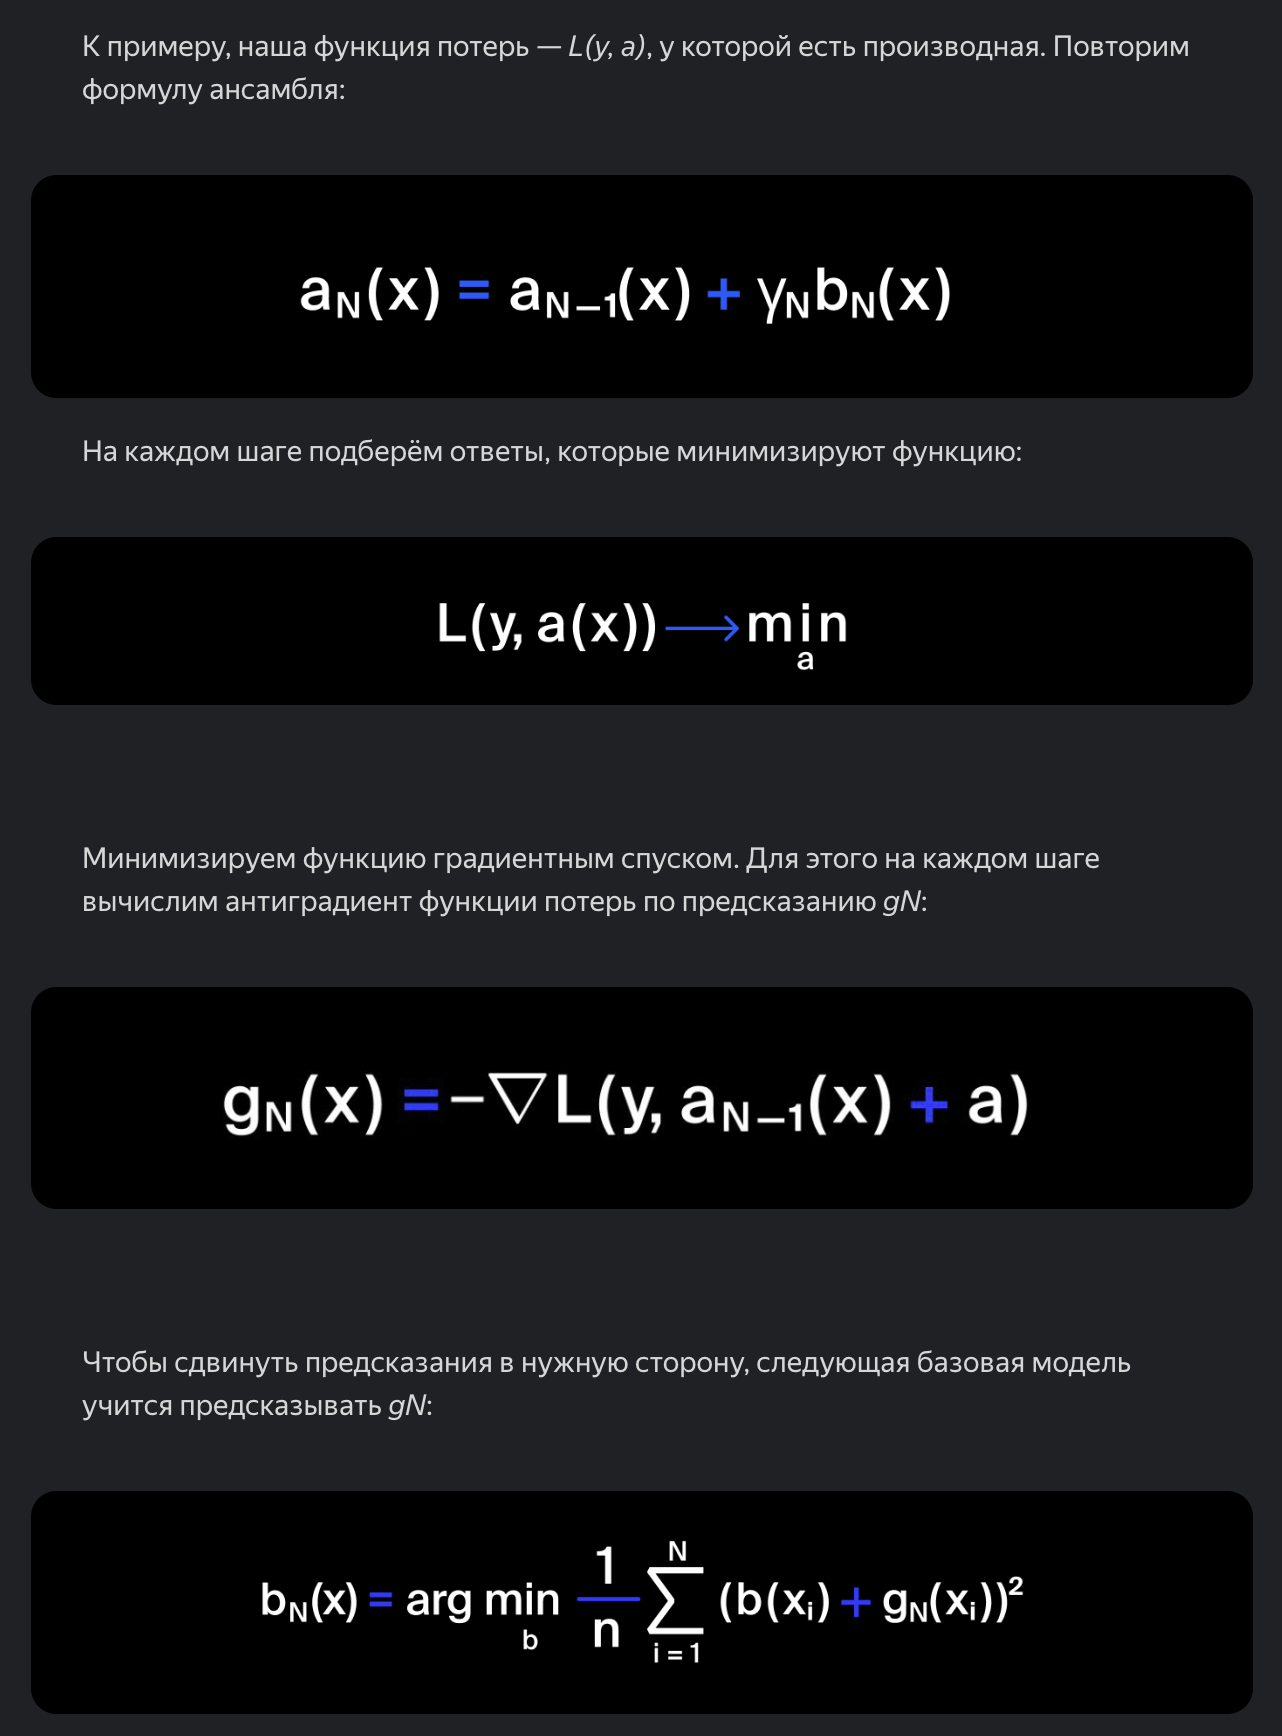

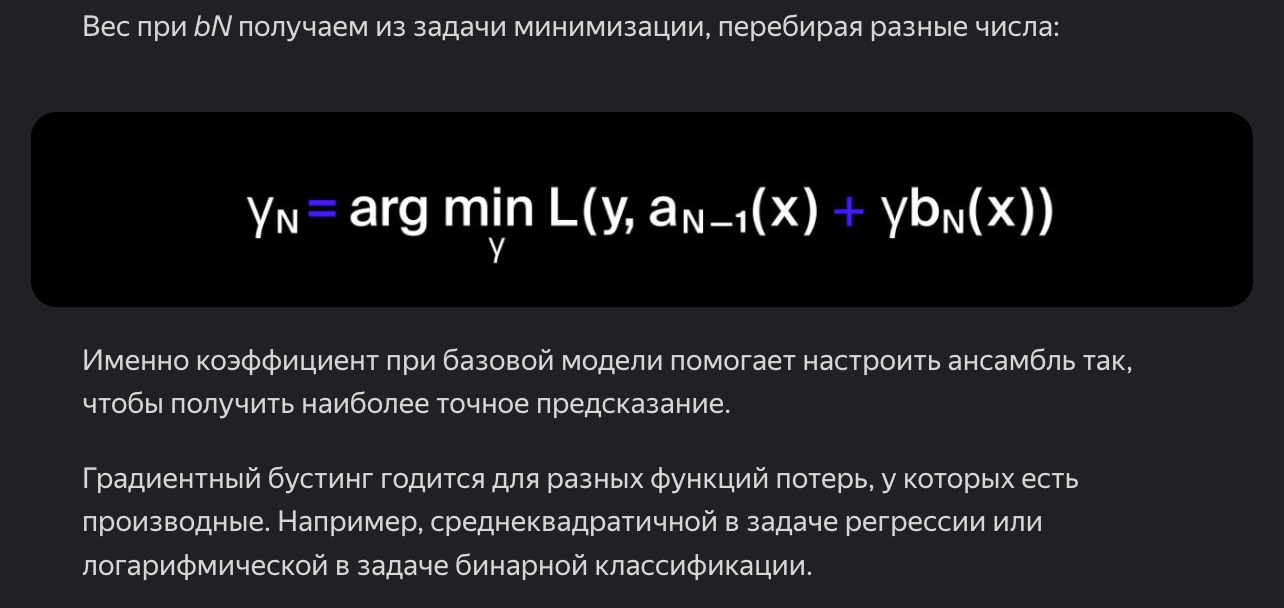

Библиотеки для градиентного бустинга

- XGBoost (от англ. extreme gradient boosting; «экстремальный градиентный бустинг») — популярная на платформе Kaggle библиотека градиентного бустинга. Открытое программное обеспечение. Вышло в 2014 году.

- LightGBM (от англ. light gradient boosting machine; «лёгкая машина градиентного бустинга»). Разработка компании Microsoft, быстро и точно обучает градиентный бустинг. Работает с категориальными признаками напрямую. Вышла в 2017 году. Сравнение с XGBoost: https://lightgbm.readthedocs.io/en/latest/Experiments.html
- CatBoost (от англ. categorical boosting; «бустинг для категориальных признаков»). Разработка Яндекса, превосходит другие алгоритмы по метрикам качества. Применяет различные техники кодирования категориальных признаков (LabelEncoding, One-Hot Encoding*). Вышла в 2017 году. Сравнение с XGBoost и LightGBM: https://catboost.ai/#benchmark

Например, CatBoost работает с категориальными признаками просто: такса остаётся таксой, а стаффорд — стаффордом. Кодировать в 1 или 0 не нужно.



Пример: 

Подберите такие гиперпараметры модели, чтобы получить значение AUC-ROC не меньше 0.822 — наилучшего результата этой метрики из курса «Обучение с учителем». Можете попробовать получить и больше.

Логика движения:

1) В категориальных признаках есть пропуски, записанные как новые значения: например, None в столбце Gender. Для CatBoost это не проблема, для библиотеки они — это отдельная категория. 

2) Импортируем из библиотеки CatBoostClassifier (англ. «классификатор CatBoost») и создадим модель. Поскольку у нас задача классификации, укажем логистическую функцию потерь. Итераций будет 10, чтобы не ждать долго.

3) Обучим модель методом fit(). Помимо целевого признака и признаков, передадим модели категориальные признаки

4) Когда итераций много и на каждой информация выводиться не должна, применяют аргумент verbose (англ. «подробный»)

Результат - улучшенное значение метрики

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/12_numeric_methods/data/travel_insurance.csv')

data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commission (in value),Gender,Age
0,JZI,Airlines,Online,Value Plan,0,12,"TAIWAN, PROVINCE OF CHINA",45.0,15.75,M,39
1,EPX,Travel Agency,Online,Cancellation Plan,0,50,JAPAN,22.0,0.00,None,36
2,EPX,Travel Agency,Online,Cancellation Plan,0,251,BRAZIL,80.0,0.00,None,36
3,EPX,Travel Agency,Online,Cancellation Plan,0,6,INDIA,-10.0,0.00,None,36
4,JZI,Airlines,Online,Value Plan,0,5,CHINA,45.0,15.75,M,34


In [3]:
data.Claim.unique()

array([0, 1])

In [5]:
# data = pd.read_csv('/datasets/travel_insurance.csv')

features_train, features_valid, target_train, target_valid = train_test_split(
    data.drop('Claim', axis=1), data.Claim, test_size=0.25, random_state=12345)

cat_features = ['Agency', 'Agency Type', 'Distribution Channel',
                'Product Name', 'Destination', 'Gender']

model = CatBoostClassifier(loss_function="Logloss", iterations=50) 

model.fit(features_train, target_train, cat_features=cat_features, verbose=10)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(roc_auc_score(target_valid, probabilities_one_valid))

Learning rate set to 0.5
0:	learn: 0.3376311	total: 21.6ms	remaining: 1.06s
10:	learn: 0.0670695	total: 115ms	remaining: 409ms


20:	learn: 0.0650226	total: 205ms	remaining: 283ms
30:	learn: 0.0646942	total: 325ms	remaining: 199ms
40:	learn: 0.0642208	total: 417ms	remaining: 91.5ms
49:	learn: 0.0636838	total: 515ms	remaining: 0us
0.8288917542370955
